In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
census_df=pd.read_csv(r"adult_census_dataset.csv")

In [98]:
census_df.head()

,age,workclass,fnlwgt,education,eductaion-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [99]:
census_df.shape

(32561, 15)

In [100]:
census_df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [101]:
census_df['workclass']=census_df['workclass'].str.strip()

In [102]:
census_df['occupation']=census_df['occupation'].str.strip()

In [103]:
census_df['education']=census_df['education'].str.strip()
census_df['marital-status']=census_df['marital-status'].str.strip()
census_df['relationship']=census_df['relationship'].str.strip()
census_df['race']=census_df['race'].str.strip()
census_df['country']=census_df['country'].str.strip()
census_df['income']=census_df['income'].str.strip()

## Data exploration

In [104]:
census_df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
eductaion-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
income            0
dtype: int64

In [105]:
###Summary statistics of continous variables

census_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
eductaion-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [106]:
###Exploring categorial Variables

census_df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [107]:
census_df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [108]:
import warnings
warnings.filterwarnings("ignore")

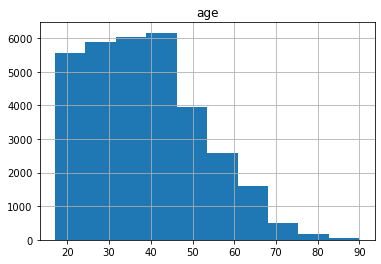

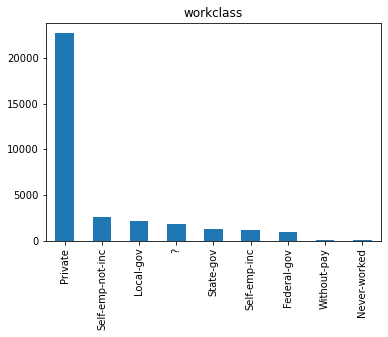

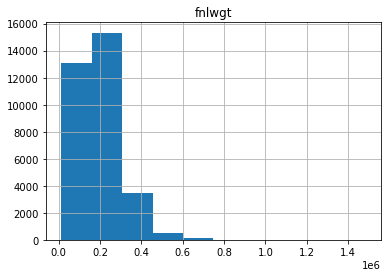

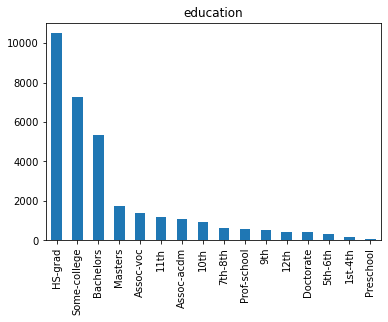

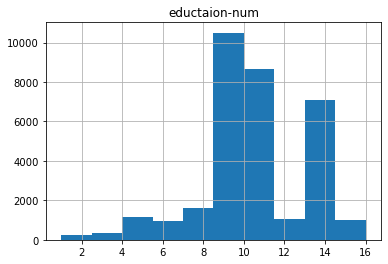

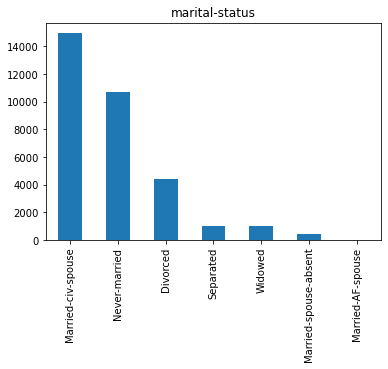

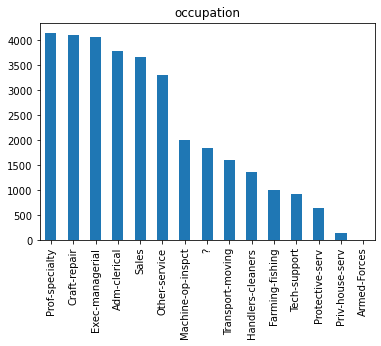

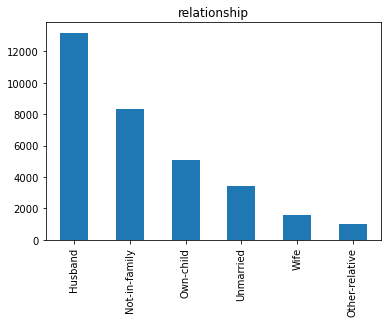

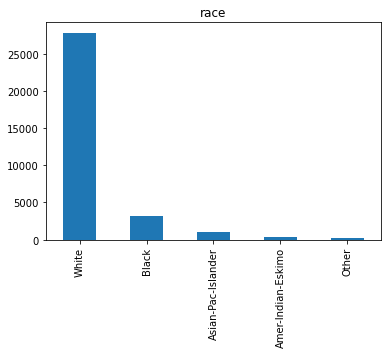

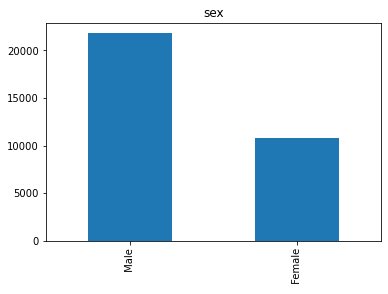

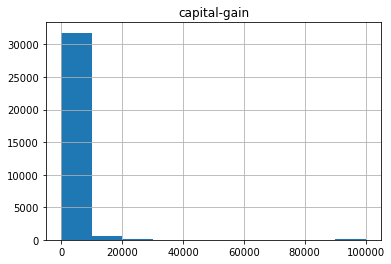

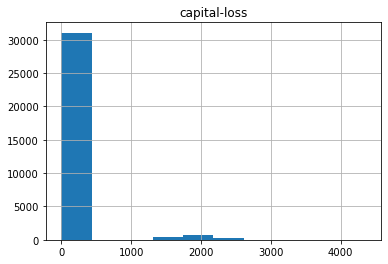

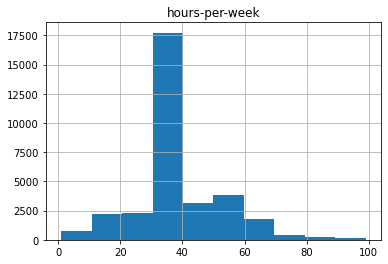

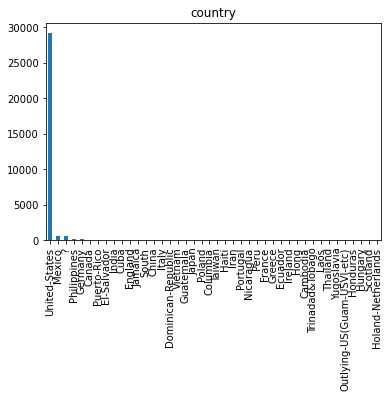

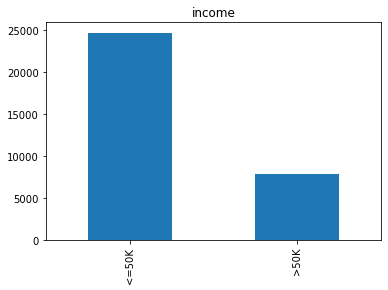

In [109]:
import matplotlib.pyplot as plt
import numpy as np
for column in census_df.columns:
    if census_df.dtypes[column] == np.object:
        census_df[column].value_counts().plot(kind="bar", title=column)
    else:
        census_df[column].hist()
        plt.title(column)
    plt.show()

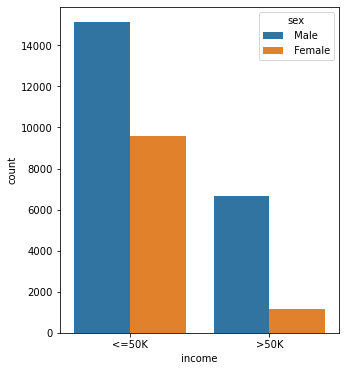

In [110]:
#Distribution of target class label by gender

plt.figure(figsize=(5,6))
# plot value_counts of Series




sns.countplot(census_df['income'],hue='sex',data=census_df)
plt.savefig('countplot_census1.png',dpi=800,bbox_inches = 'tight')

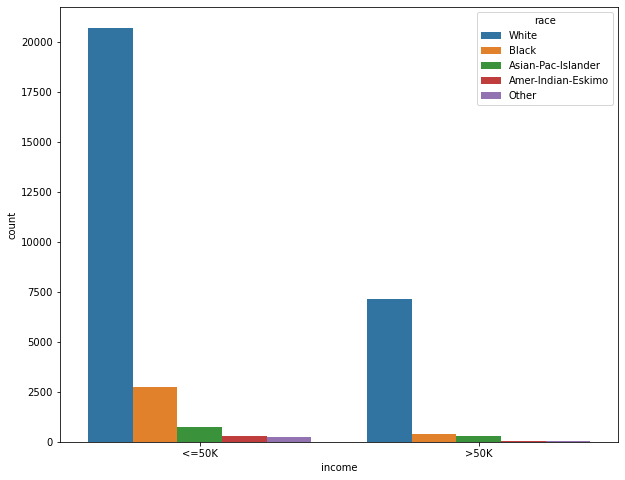

In [116]:
#Distribution of target class label by Race
plt.figure(figsize=(10,8))
# plot value_counts of Series




sns.countplot(census_df['income'],hue='race',data=census_df)
plt.savefig('countplot_census2.png',dpi=800,bbox_inches = 'tight')

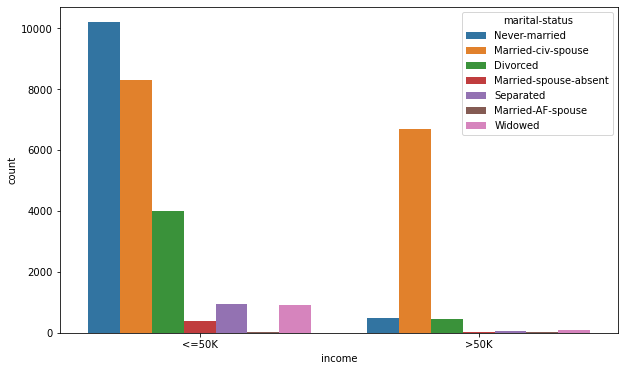

In [115]:
#Distribution of target class label by marital-status
plt.figure(figsize=(10,6))
# plot value_counts of Series




sns.countplot(census_df['income'],hue='marital-status',data=census_df)
plt.savefig('countplot_census3.png',dpi=800,bbox_inches = 'tight')

## Data preprocessing

In [40]:
##Filling ? values with the most frequent value
census_df['workclass'] = census_df['workclass'].replace('?', 'Private')



In [41]:
census_df['occupation'] = census_df['occupation'].replace('?', 'Prof-specialty')
census_df['country'] = census_df['country'].replace('?', 'United-States')

In [42]:
# education Category-Reducing the number of categories for the variable

census_df.education= census_df.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
census_df.education = census_df.education.replace('HS-grad', 'high school')
census_df.education = census_df.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
census_df.education = census_df.education.replace('Bachelors', 'undergrad')
census_df.education = census_df.education.replace('Masters', 'grad')
census_df.education = census_df.education.replace('Doctorate', 'doc')

In [43]:
census_df.education.value_counts()

high school    10501
higher         10316
undergrad       5355
school          4253
grad            1723
doc              413
Name: education, dtype: int64

In [44]:
census_df['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [45]:
#martial status
census_df['marital-status']= census_df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
census_df['marital-status']= census_df['marital-status'].replace(['Never-married'], 'not-married')
census_df['marital-status']= census_df['marital-status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other')

In [46]:
census_df['marital-status'].value_counts()

married        14999
not-married    10683
other           6879
Name: marital-status, dtype: int64

In [47]:
# income
census_df.income = census_df.income.replace('<=50K', 0)
census_df.income = census_df.income.replace('>50K', 1)

In [48]:
census_df['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

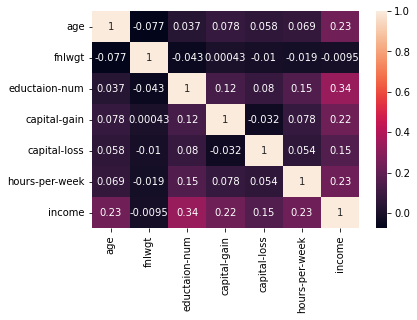

In [49]:
##Plotting the correlation heatmap

sns.heatmap(census_df.corr(), annot=True);
plt.savefig('heatmap.png',dpi=800,bbox_inches = 'tight')

In [50]:
###To transfrom categoricalvariables into numerical values we shall perform label encoding

from sklearn.preprocessing import LabelEncoder

df1= census_df.copy()
df1= df1.apply(LabelEncoder().fit_transform)
df1.head()

,age,workclass,fnlwgt,education,eductaion-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,income
0,22,6,2671,5,12,1,0,1,4,1,25,0,39,38,0
1,33,5,2926,5,12,0,3,0,4,1,0,0,12,38,0
2,21,3,14086,2,8,2,5,1,4,1,0,0,39,38,0
3,36,3,15336,4,6,0,5,0,2,1,0,0,39,38,0
4,11,3,19355,5,12,0,9,5,2,0,0,0,39,4,0


In [51]:
###Now Feature scaling is performed
from sklearn.preprocessing import StandardScaler
ss= StandardScaler().fit(df1.drop('income', axis=1))
X= ss.transform(df1.drop('income', axis=1))
y= census_df['income']

## Model Building and Evaluation

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [53]:
from sklearn.svm import SVC
model1 = SVC(kernel='linear')

In [54]:
model1.fit(X_train,y_train)

SVC(kernel='linear')

In [63]:
print("Accuracy score of the model is",model1.score(X_test,y_test))

Accuracy score of the model is 0.8309534776600644


In [69]:
from sklearn.metrics import  classification_report

In [70]:
y_pred = model1.predict(X_test)
print("Classification Report:\n {}".format(classification_report(y_test, y_pred)))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      4929
           1       0.72      0.49      0.59      1584

    accuracy                           0.83      6513
   macro avg       0.79      0.72      0.74      6513
weighted avg       0.82      0.83      0.82      6513



In [71]:
from sklearn.svm import SVC
model2 = SVC(kernel='rbf')

In [72]:
model2.fit(X_train,y_train)

SVC()

In [73]:
print("Accuracy score of the model is",model2.score(X_test,y_test))

Accuracy score of the model is 0.8441578381698143


In [74]:
y_pred = model2.predict(X_test)
print("Classification Report:\n {}".format(classification_report(y_test, y_pred)))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      4929
           1       0.75      0.54      0.63      1584

    accuracy                           0.84      6513
   macro avg       0.81      0.74      0.76      6513
weighted avg       0.84      0.84      0.83      6513



In [75]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=10)

In [76]:
model3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [77]:
model3.score(X_test,y_test)

0.8412405957316137

In [78]:
y_pred = model3.predict(X_test)
print("Classification Report:\n {}".format(classification_report(y_test, y_pred)))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      4929
           1       0.72      0.56      0.63      1584

    accuracy                           0.84      6513
   macro avg       0.80      0.75      0.77      6513
weighted avg       0.83      0.84      0.83      6513



In [79]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators=100)
model4.fit(X_train, y_train)

RandomForestClassifier()

In [80]:
model4.score(X_test,y_test)

0.849531705819131

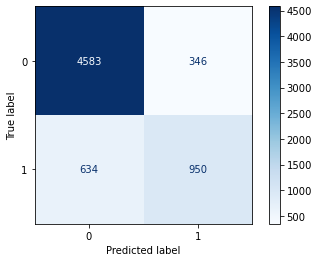

In [81]:
from sklearn.metrics import plot_confusion_matrix
disp= plot_confusion_matrix(model4,X_test,y_test,cmap='Blues')

In [82]:
y_pred = model4.predict(X_test)
print("Classification Report:\n {}".format(classification_report(y_test, y_pred)))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      4929
           1       0.73      0.60      0.66      1584

    accuracy                           0.85      6513
   macro avg       0.81      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513



## Hyperparamter Tuning

In [86]:
#Since Rnadomforest is giving maximum accuracy we shall perform hyperparamter tuning on it
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [88]:

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [89]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [90]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')

In [91]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=500, random_state=42)

In [92]:
rfc1.score(X_test,y_test)

0.8513741747274681

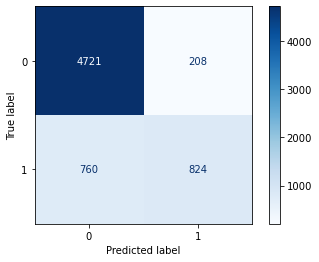

In [94]:
from sklearn.metrics import plot_confusion_matrix
disp= plot_confusion_matrix(rfc1,X_test,y_test,cmap='Blues')

In [93]:
y_pred = rfc1.predict(X_test)
print("Classification Report:\n {}".format(classification_report(y_test, y_pred)))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      4929
           1       0.80      0.52      0.63      1584

    accuracy                           0.85      6513
   macro avg       0.83      0.74      0.77      6513
weighted avg       0.85      0.85      0.84      6513

